# Taak AI - Computer Vision

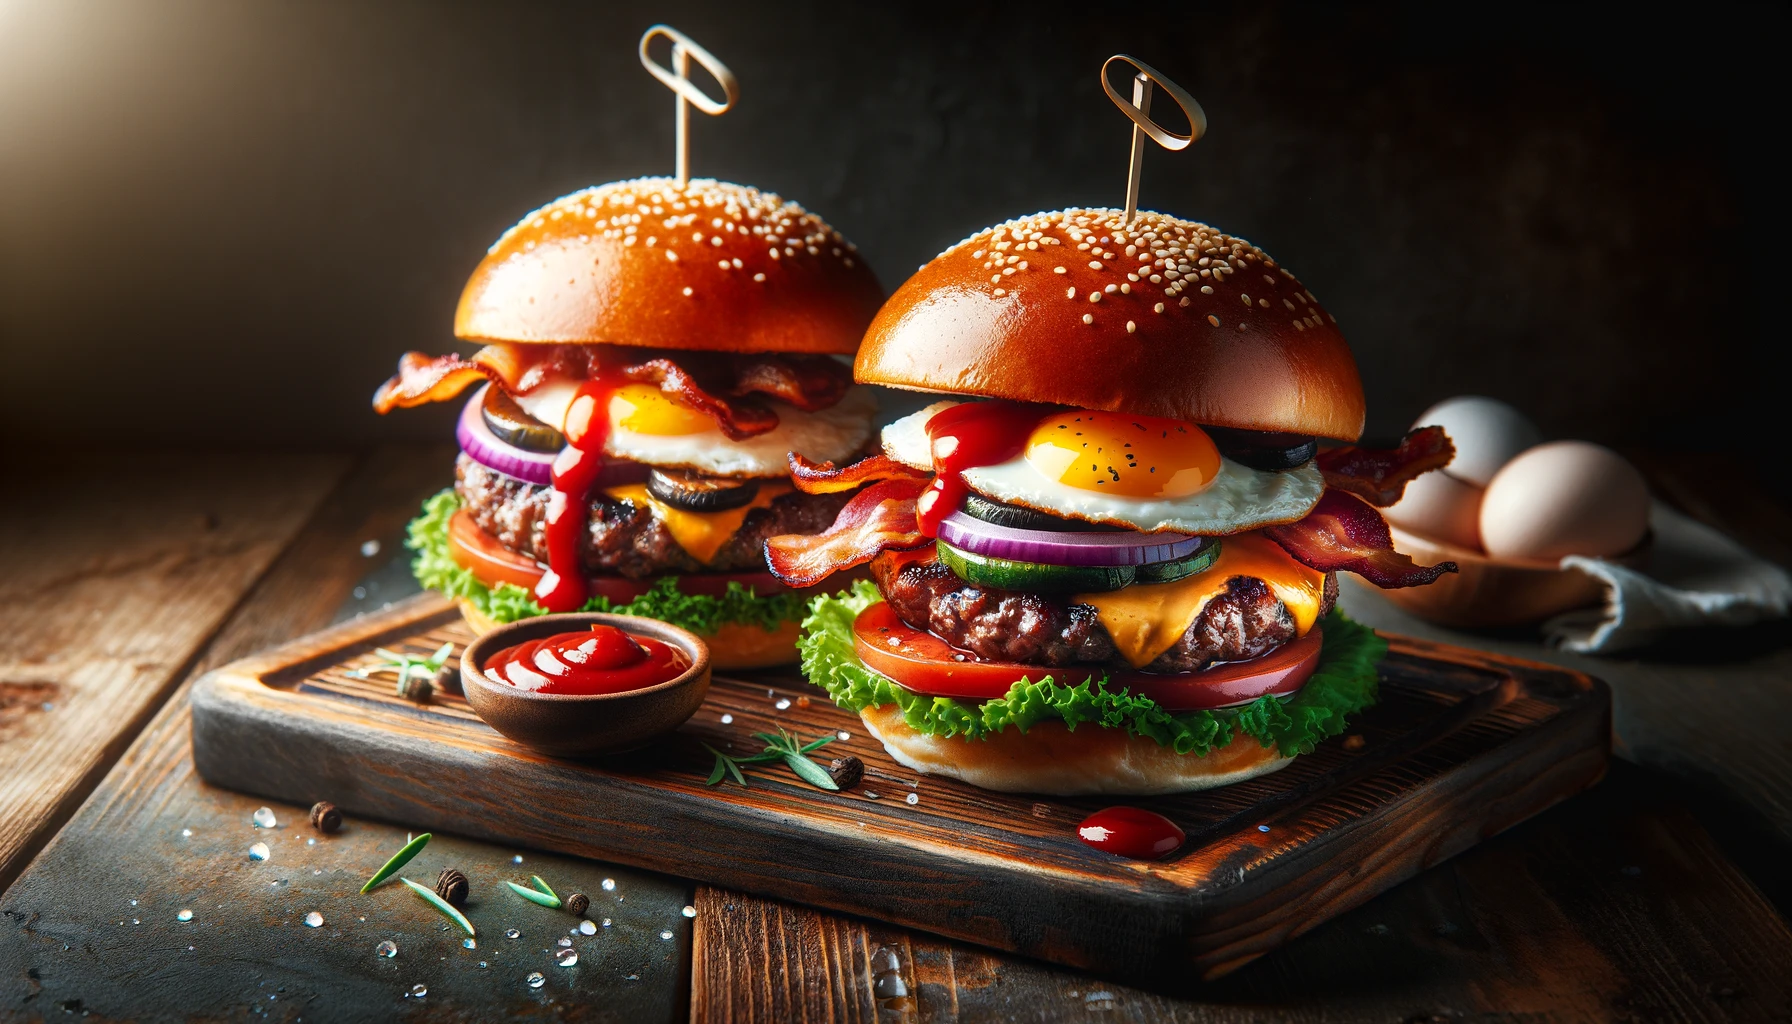

# Opgave: Classificatie van afbeeldingen mbv een Convolutioneel Neuraal Netwerk

## Doelstelling

Het doel van deze opgave is het classificeren van afbeeldingen met behulp van een **Convolutioneel Neuraal Netwerk (CNN)**. Gebruik de dataset die wordt aangeleverd om je model te trainen en te testen. Je hebt de keuze tussen **PyTorch en Tensorflow** als ML framework. 

**BELANGRIJK! VOLG DE BEST PRACTICES ZOALS GEZIEN IN DE THEORIELES!**

## Werkwijze

1. **Code en tekst**: Voeg je eigen code en tekst toe in deze notebook. Zorg voor een heldere structuur en logische volgorde.

2. **Argumentatie**: Onderbouw duidelijk je gemaakte keuzes. Een goed presterend model is belangrijk, maar de argumentatie achter je keuzes is essentieel om je begrip van de materie aan te tonen. Documenteer je voortgang en bevindingen rechtstreeks in de notebook.

3. **Technieken en experimenten**: Je bent niet beperkt tot de technieken besproken in de theorie/labo. Voel je vrij om andere methodes te verkennen, maar zorg dat je experimenten en keuzes goed onderbouwd zijn.

5. **Tip**: Maak gebruik van de TensorFlow / PyTorch API documentatie. Plaats je cursor binnen de haakjes van een Python functie en druk op SHIFT + TAB om de functie-documentatie te raadplegen.

## Verbetersleutel

|  Onderdeel                                    | # punten |
|-----------------------------------------------|:--------:|
|  Data inlezen, voorbereiden en analyseren           |    /3    |
|  ML model definitie + training                                    |    /4    |
|  &emsp;- Lagen, neuronen, en activatiefuncties      |
|  &emsp;- Keuze van loss functie en evaluatiemetrics |
|  &emsp;- Keuze van optimizer (vergelijk minstens 2 optimizers en toon deze vergelijking dmv code en tekst!) |
|  Regularisatie                    |    /6    |
|  &emsp; Test en bespreek minstens 4 regularisatietechnieken |
|  Model evaluatie                     |    /3    |
|  &emsp; Hoe goed presteert het model op ongeziene data? |
|  Rapportering                     |    /4    |
|  &emsp; Heldere en duidelijke argumentatie verspreid als Markdown tussen je code-cellen) |
|  **Totaal**                       |    /20   |

### Belangrijk bij de beoordeling:

- **Duidelijkheid**: Hoe helder en logisch is jouw aanpak?
- **Onderbouwing**: In hoeverre zijn de technische keuzes en experimenten goed onderbouwd en verantwoord?
- **Resultaten**: Hoe effectief zijn de toegepaste technieken en hoe goed presteert het uiteindelijke model (op ongeziene data)?

### Praktische afspraken:
Dit project wordt **ten laatste** ingediend op Toledo voor donderdag 12 december om 20u.

Hiervoor maak je een .ZIP bestand van je notebook en eventueel extra data die je nodig hebt om jouw notebook uit te voeren. Bezorg je **uitgevoerde notebook**, zodat we jouw output kunnen zien in het geval niet alle code bij ons uitvoerbaar is. De dataset zelf hoef je niet mee te sturen. 

#### Alvast veel succes!

## Imports

In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data inlezen, voorbereiden en analyseren

_Het is niet de bedoeling dat je de dataset zelf nog aanvult, maar je mag bijvoorbeeld wel gebruik maken van Transfer Learning._

- Data exploratie: Onderzoek de gegevens om inzicht te krijgen in de distributie, mogelijke outliers, en basisstatistieken.
- Data cleaning: Verwijder of corrigeer onjuiste, onvolledige of irrelevante gegevens.
- Feature engineering: Transformeer de ruwe gegevens in een vorm die beter geschikt is voor modellering. 
- Data splitsen: Verdeel de gegevens in trainings-, validatie- en testsets.

In [26]:
dataset_path = "./dataset"
width = 64
height = 64
batch_size = 16

# Dataset splitsen in training- en testset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # 20% van de data voor de testset
    subset="training",  # Trainingset selecteren
    seed=42,  # Zorg voor reproduceerbare splitsing
    image_size=(width,height),  # Alle afbeeldingen schalen naar 224x224 pixels
    batch_size=batch_size # Batches van 32 samples
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # 20% van de data voor de testset
    subset="validation",  # Testset selecteren
    seed=42,
    image_size=(width,height),
    batch_size=batch_size
)


Found 18631 files belonging to 101 classes.
Using 14905 files for training.
Found 18631 files belonging to 101 classes.
Using 3726 files for validation.


In [27]:
# Klassen bekijken
class_names = train_ds.class_names
print("Klassen:", class_names)
# Normaliseer de data door de pixelwaarden te delen door 255.0

# Controleer de grootte van de datasets
print(f"Trainingset: {len(train_ds)} batches")
print(f"Testset: {len(test_ds)} batches")

Klassen: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 

In [28]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

for images, labels in train_ds.take(1):
    print("Pixelwaarde vóór normalisatie:", images[0].numpy().max())  # Maximaal 1.0
    print("Label:", labels[0].numpy())  # Behoud de labels

Pixelwaarde vóór normalisatie: 1.0
Label: 17


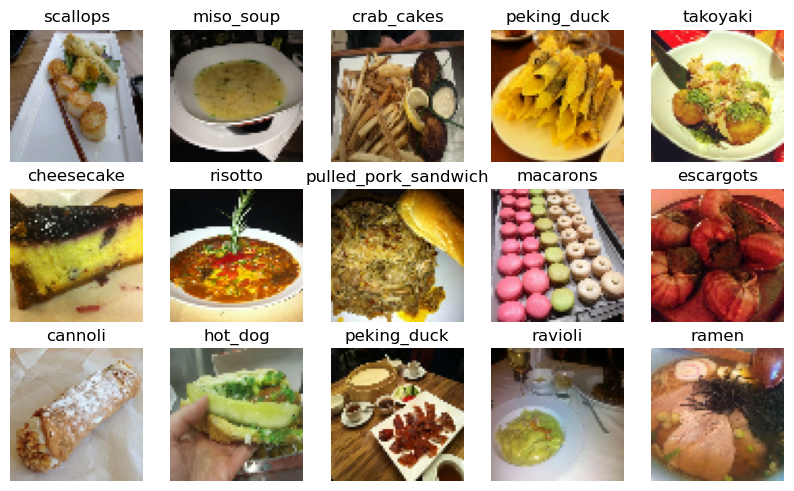

In [29]:
plt.figure(figsize=(10, 10))

# Neem één batch van de trainingsset
for images, labels in train_ds.take(1):  # Haalt één batch van afbeeldingen op
    for i in range(15):  # Toon maximaal 25 afbeeldingen
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())  # Zet het beeld om naar numpy
        plt.title(class_names[labels[i]])  # Gebruik de klasse om het label te tonen
        plt.axis("off")  # Geen assen weergeven

plt.show()

In [5]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

for images, labels in train_ds.take(1):
    print("Pixelwaarde vóór normalisatie:", images[0].numpy().max())  # Maximaal 1.0
    print("Label:", labels[0].numpy())  # Behoud de labels

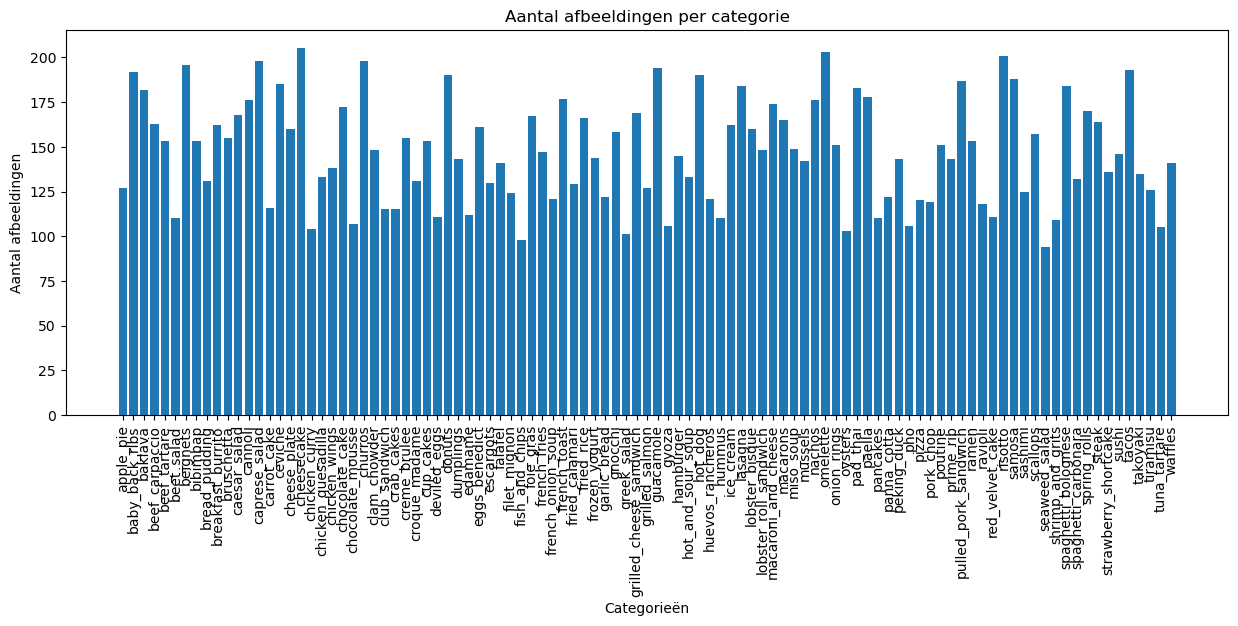

In [6]:
# Verzamel alle labels
all_labels = []
for _, labels in train_ds.unbatch():
    all_labels.append(labels.numpy())

# Converteer de verzamelde labels naar een numpy-array
all_labels = np.array(all_labels)

# Tel het aantal afbeeldingen per categorie
unique_labels, counts = np.unique(all_labels, return_counts=True)

# Maak een staafdiagram
plt.figure(figsize=(15, 5))
plt.bar([class_names[i] for i in unique_labels], counts)
plt.xlabel("Categorieën")
plt.ylabel("Aantal afbeeldingen")
plt.title("Aantal afbeeldingen per categorie")
plt.xticks(rotation=90)
plt.show()


## ML Model definitie

- Kies een model type: Beslis welk type model (bijv. regressie, classificatie, clustering) het meest geschikt is voor het probleem.
- Configureer het model: Stel de parameters en de structuur van het model in (zoals de architectuur van je CNN).
- Initialisatie van het model: Bereid het model voor op training door bv. de gewichten te initialiseren.

In [7]:
# CNN Model
model = models.Sequential([
    # Eerste Convolutionele Laag
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(width,height, 3)),  # 32 filters van 3x3
    layers.MaxPooling2D((2, 2)),  # Max Pooling om de dimensies te verkleinen

    # Tweede Convolutionele Laag
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten (omzetten naar 1D voor Dense lagen)
    layers.Flatten(),

    # Volledig Verbonden Laag
    layers.Dense(128, activation='relu'),  # 128 neuronen
    # Output Laag (met softmax voor multi-class classificatie)
    layers.Dense(len(class_names), activation='softmax')  # Aantal neuronen = aantal klassen
])

# Model Overzicht
model.summary()

C:\Users\frederic\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,061 (3.13 MB)

 Trainable params: 821,061 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Model compileren
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer='adam',  # Je kunt ook 'sgd' of andere optimizers vergelijken
    loss='sparse_categorical_crossentropy',  # Gebruik 'categorical_crossentropy' als de labels one-hot zijn
    metrics=['accuracy']  # Monitor de nauwkeurigheid
)


## Training

Train je model op de aangeleverde dataset. Voorzie een goede verdeling tussen training- en testset.

- Kies een trainingsalgoritme: Met welk algoritme ga je jouw model trainen (bijv. gradient descent)?
- Optimalisatie: Pas de modelparameters aan om de voorspellingsfout op de trainingsdata te minimaliseren.
- Hyperparameter tuning: Experimenteer met verschillende instellingen van de hyperparameters om de beste resultaten te krijgen (zoals bv. de learning rate).
- Monitoring van het trainingsproces: Houd de prestaties van het model tijdens het trainingsproces in de gaten om overfitting of andere problemen te identificeren **(voorzie een duidelijke plot in je notebook!)**.

In [9]:
AUTOTUNE = tf.data.AUTOTUNE  # Automatische afstemming voor betere prestaties

# Optimaliseer trainingsdataset
train_ds = train_ds.cache()  # Cache de dataset in het geheugen
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)  # Laad batches vooraf

# Optimaliseer testdataset
test_ds = test_ds.cache()
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [10]:
# Train het model
history = model.fit(
    train_ds,  # Trainingsdataset
    validation_data=test_ds,  # Validatiedataset
    epochs=10,  # Aantal epochs (kan verhoogd worden)
    batch_size=batch_size,  # Batchgrootte (komt uit je dataset)
    verbose=1  # Toon de voortgang
)


Epoch 1/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.0157 - loss: 9.3922 - val_accuracy: 0.0140 - val_loss: 4.5985
Epoch 2/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0397 - loss: 4.4506 - val_accuracy: 0.0212 - val_loss: 4.6391
Epoch 3/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1187 - loss: 4.0177 - val_accuracy: 0.0196 - val_loss: 4.9325
Epoch 4/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2102 - loss: 3.5580 - val_accuracy: 0.0166 - val_loss: 5.3153
Epoch 5/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2431 - loss: 3.4250 - val_accuracy: 0.0129 - val_loss: 5.6352
Epoch 6/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2794 - loss: 3.3158 - val_accuracy: 0.0161 - val_loss: 6.1358
Epoch 7/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3367 - loss: 3.0478 - val_accuracy: 0.0132 - val_loss: 6.5105
Epoch 8/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3739 - loss: 2.8749 - val_accuracy: 

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0190 - loss: 11.2893
Test Loss: 11.280000686645508
Test Accuracy: 1.77%


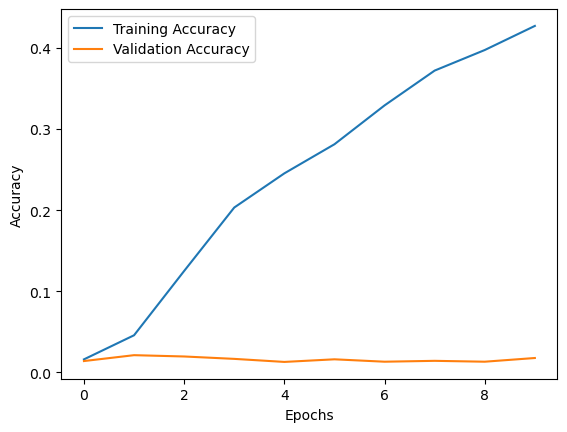

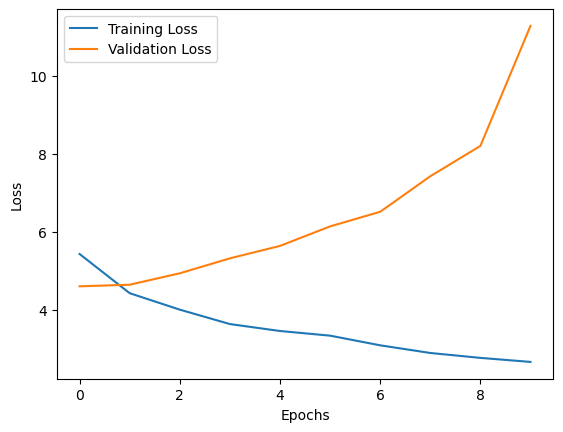

In [11]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

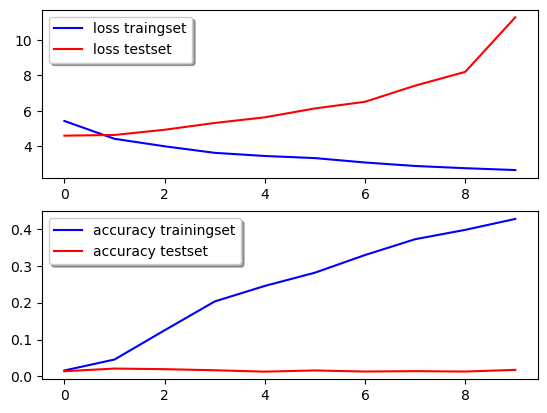

In [12]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='loss traingset')
ax[0].plot(history.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='accuracy trainingset')
ax[1].plot(history.history['val_accuracy'], color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

## Regularisatie

Test en bespreek minimaal vier verschillende regularisatietechnieken. Het is cruciaal om elke techniek afzonderlijk te testen en te vergelijken met je standaardmodel zonder regularisatie. Dit is nodig om het individuele effect van elke techniek nauwkeurig te kunnen beoordelen.

### Techniek 1:

Dropout "schakelt" willekeurig een fractie van de neuronen uit tijdens de training, waardoor het model minder afhankelijk wordt van specifieke neuronen en overfitting voorkomt.

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # 50% van de neuronen worden uitgeschakeld
    layers.Dense(len(class_names), activation='softmax')
])

In [14]:
model.compile(
    optimizer='adam',  # Je kunt ook 'sgd' of andere optimizers vergelijken
    loss='sparse_categorical_crossentropy',  # Gebruik 'categorical_crossentropy' als de labels one-hot zijn
    metrics=['accuracy']  # Monitor de nauwkeurigheid
)

In [15]:
# Train het model
history_dropout = model.fit(
    train_ds,  # Trainingsdataset
    validation_data=test_ds,  # Validatiedataset
    epochs=10,  # Aantal epochs (kan verhoogd worden)
    batch_size=batch_size,  # Batchgrootte (komt uit je dataset)
    verbose=1  # Toon de voortgang
)

Epoch 1/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.0103 - loss: 9.2531 - val_accuracy: 0.0137 - val_loss: 4.6070
Epoch 2/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.0128 - loss: 4.6044 - val_accuracy: 0.0113 - val_loss: 4.6036
Epoch 3/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.0125 - loss: 4.6007 - val_accuracy: 0.0113 - val_loss: 4.6024
Epoch 4/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.0131 - loss: 4.5990 - val_accuracy: 0.0113 - val_loss: 4.6021
Epoch 5/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.0128 - loss: 4.5982 - val_accuracy: 0.0113 - val_loss: 4.6021
Epoch 6/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.0129 - loss: 4.5979 - val_accuracy: 0.0113 - val_loss: 4.6022
Epoch 7/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.0131 - loss: 4.5978 - val_accuracy: 0.0113 - val_loss: 4.6023
Epoch 8/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.0131 - loss: 4.5978 - 

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0116 - loss: 4.6016
Test Loss: 4.6026225090026855
Test Accuracy: 1.13%


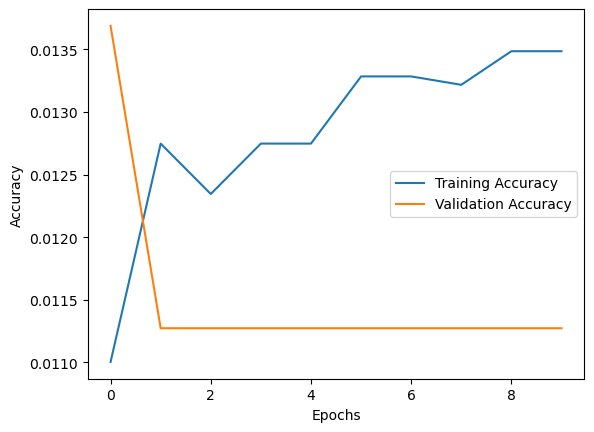

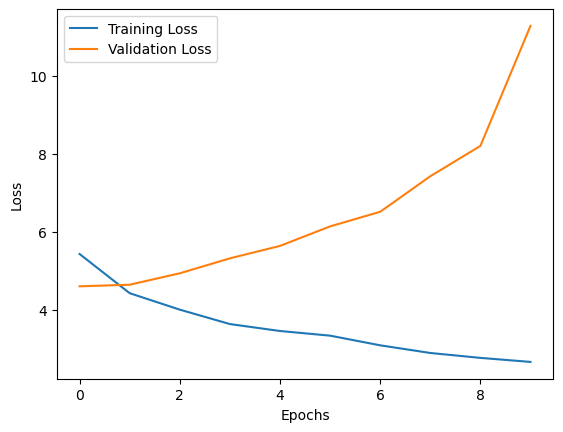

In [16]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Techniek 2:


In [17]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=regularizers.l2(0.01)),  
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',  # Je kunt ook 'sgd' of andere optimizers vergelijken
    loss='sparse_categorical_crossentropy',  # Gebruik 'categorical_crossentropy' als de labels one-hot zijn
    metrics=['accuracy']  # Monitor de nauwkeurigheid
)

# Train het model
history_L2 = model.fit(
    train_ds,  # Trainingsdataset
    validation_data=test_ds,  # Validatiedataset
    epochs=10,  # Aantal epochs (kan verhoogd worden)
    batch_size=batch_size,  # Batchgrootte (komt uit je dataset)
    verbose=1  # Toon de voortgang
)


Epoch 1/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.0128 - loss: 10.9829 - val_accuracy: 0.0158 - val_loss: 5.4053
Epoch 2/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.0164 - loss: 5.3245 - val_accuracy: 0.0220 - val_loss: 5.0594
Epoch 3/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.0241 - loss: 5.0292 - val_accuracy: 0.0199 - val_loss: 4.9870
Epoch 4/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.0318 - loss: 4.8970 - val_accuracy: 0.0231 - val_loss: 5.0284
Epoch 5/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.0398 - loss: 4.8329 - val_accuracy: 0.0201 - val_loss: 4.9939
Epoch 6/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.0514 - loss: 4.7541 - val_accuracy: 0.0161 - val_loss: 5.1020
Epoch 7/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.0590 - loss: 4.7444 - val_accuracy: 0.0166 - val_loss: 5.2208
Epoch 8/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.0722 - loss: 4.7133 -

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Techniek 3:
Early stopping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train het model met Early Stopping
history_earlystopping = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.0230 - loss: 5.0273 - val_accuracy: 0.0271 - val_loss: 4.6516
Epoch 2/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.0305 - loss: 4.5930 - val_accuracy: 0.0317 - val_loss: 4.5453
Epoch 3/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.0343 - loss: 4.5145 - val_accuracy: 0.0357 - val_loss: 4.5195
Epoch 4/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.0368 - loss: 4.4928 - val_accuracy: 0.0354 - val_loss: 4.5058
Epoch 5/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.0351 - loss: 4.4775 - val_accuracy: 0.0360 - val_loss: 4.5025
Epoch 6/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.0381 - loss: 4.4685 - val_accuracy: 0.0346 - val_loss: 4.4992
Epoch 7/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.0416 - loss: 4.4567 - val_accuracy: 0.0368 - val_loss: 4.4868
Epoch 8/20
932/932 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.0437 - loss: 4.4459 - 

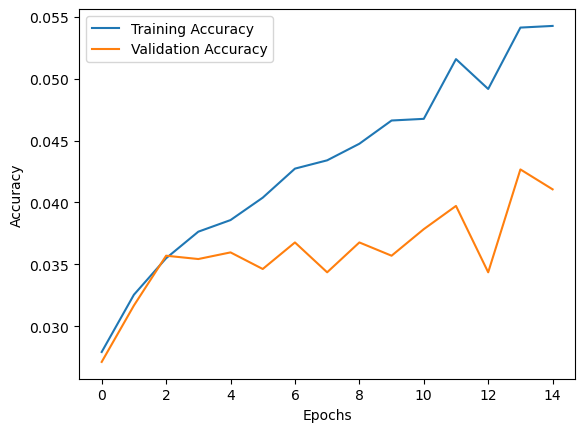

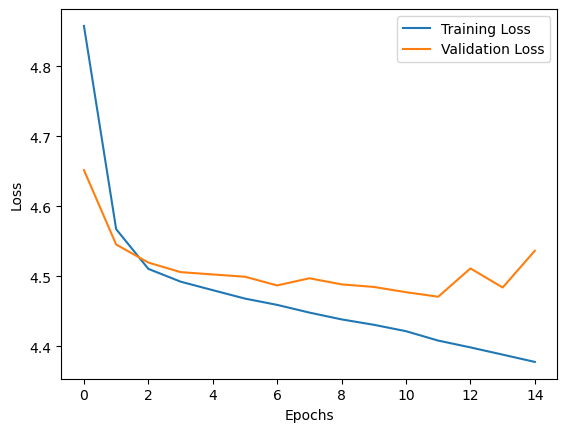

In [32]:


# Plot accuracy
plt.plot(history_earlystopping.history['accuracy'], label='Training Accuracy')
plt.plot(history_earlystopping.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_earlystopping.history['loss'], label='Training Loss')
plt.plot(history_earlystopping.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Techniek 4:
Weight Initialization

In [36]:
from tensorflow.keras import layers, models, initializers

# Gebruik specifieke initializers voor lagen
model = models.Sequential([
    # Eerste Convolutionele Laag
    layers.Conv2D(32, (3, 3),activation='relu',kernel_initializer=initializers.HeNormal(),input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),

    # Tweede Convolutionele Laag
    layers.Conv2D(64, (3, 3),activation='relu',kernel_initializer=initializers.HeNormal()),
    layers.MaxPooling2D((2, 2)),

    # Derde Convolutionele Laag
    layers.Conv2D(128, (3, 3),activation='relu',kernel_initializer=initializers.HeNormal()),
    layers.MaxPooling2D((2, 2)),

    # Flatten en Dense lagen
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer=initializers.HeNormal()),
    layers.Dropout(0.5),  # Dropout voor regularisatie
    layers.Dense(len(class_names),activation='softmax',kernel_initializer=initializers.GlorotUniform())
])

# Model compileren
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Modeloverzicht
model.summary()

history_he = model.fit(
    train_ds,  # Training dataset
    validation_data=test_ds,  # Validation dataset
    epochs=30,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Print progress
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 696,229 (2.66 MB)

 Trainable params: 696,229 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
932/932 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.0114 - loss: 4.6398 - val_accuracy: 0.0172 - val_loss: 4.5545
Epoch 2/30
932/932 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.0242 - loss: 4.5368 - val_accuracy: 0.0521 - val_loss: 4.3337
Epoch 3/30
932/932 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.0482 - loss: 4.3682 - val_accuracy: 0.0768 - val_loss: 4.1654
Epoch 4/30
932/932 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.0633 - loss: 4.2142 - val_accuracy: 0.0891 - val_loss: 4.1062
Epoch 5/30
932/932 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.0793 - loss: 4.0794 - val_accuracy: 0.0939 - val_loss: 4.0369
Epoch 6/30
932/932 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.1000 - loss: 3.9337 - val_accuracy: 0.1092 - val_loss: 3.9699
Epoch 7/30
932/932 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.1193 - loss: 3.7908 - val_accuracy: 0.1079 - val_loss: 3.9806
Epoch 8/30
932/932 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.1448 - loss: 3.6336 - 

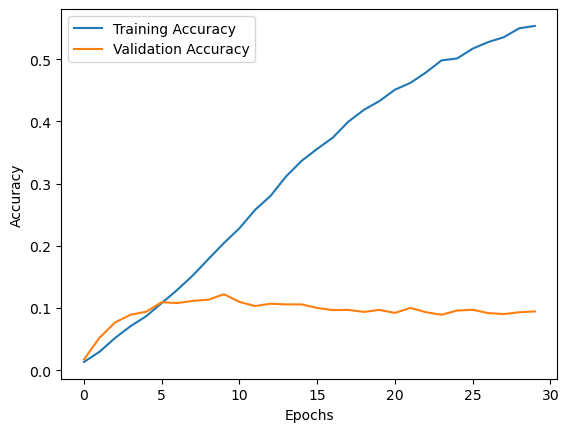

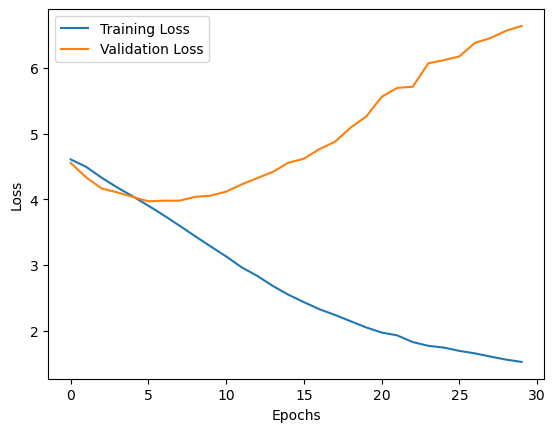

In [37]:
# Plot accuracy
plt.plot(history_he.history['accuracy'], label='Training Accuracy')
plt.plot(history_he.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_he.history['loss'], label='Training Loss')
plt.plot(history_he.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

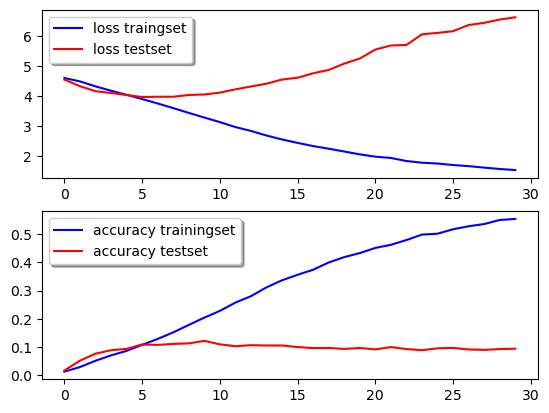

In [38]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history_he.history['loss'], color='b', label='loss traingset')
ax[0].plot(history_he.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_he.history['accuracy'], color='b', label='accuracy trainingset')
ax[1].plot(history_he.history['val_accuracy'], color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

## Model evaluatie

Evalueer de kwaliteit van je model op een correctie manier:
- Prestatiemeting: Evalueer het model op de validatie- en testsets met relevante metrieken (zoals bv. accuracy, precision, recall, F1-score, ROC-curve).
- Cross-validatie: Gebruik technieken zoals k-fold cross-validatie om de robuustheid van het model te verzekeren.
- Analyse van resultaten: Bestudeer en bespreek je resultaten.